[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/howesa/CHI22-CogMod-Tutorial/blob/main/02-Neural-Networks/DeepGaze.ipynb)


# MODULE 2: Deep Neural Nets as Models of Human Cognition
## Part II: A modelling example (DeepGazeIII)

This notebook is part of the [CHI'23 Course on Cognitive Modeling](https://sites.google.com/view/modeling-chi23/home) by Antti Oulasvirta, Andrew Howes, Jussi Jokinen.

### Learning objectives
After this block, you should be able to answer these four questions:
1. How to develop DNNs that can handle HCI-relevant inputs
2. How to exploit knowledge about human perception in the design and training of a neural architecture
3. How to inspect the limits of a DNN model in order to come up with hypotheses for cognitive modeling

### Source

This notebook is based on the [Jupyter notebook](https://github.com/matthias-k/DeepGaze) of Kümmerer et al.:

> M. Kümmerer., M. Bethge, & T.S.A. Wallis, (2022). DeepGaze III: Modeling free-viewing human scanpaths with deep learning. Journal of Vision 2022.

DeepGazeIII was one of the saliency models evaluated in UEyes, a visual saliency model study published at CHI'23: 

> Yue Jiang, Luis A. Leiva, Hamed Rezazadegan Tavakoli, Paul R. B. Houssel, Julia Kylmälä, and Antti Oulasvirta, (2023). UEyes: Understanding Visual Saliency across User Interface Types. In Proceedings of the 2023 CHI Conference on Human Factors in Computing Systems (CHI '23): https://doi.org/10.1145/3544548.3581096


## 1. Model overview
**DeepGazeIII** is a DNN-based predictive model of visual attention. 
* a state-of-the-art model for spatial fixation prediction
* predicts key aspects of human scanpaths, such as the saccade amplitude and direction distribution
* trained on natural scenes but can be retrained using other stimuli, such as user interfaces (UEyes).

![Predictions](https://users.comnet.aalto.fi/~oulasvir/deepgaze3/figure1.png)


### 1.1. What does the model do? 

* **Input:** An image, for example of a natural scene, a user interface, an infographics, or a poster. 
* **Output:** 1) The input image overlaid with a heatmap denoting predicted next fixation point. 2) Next fixation point. [Examples](https://users.comnet.aalto.fi/~oulasvir/deepgaze3/figure4.png) are provided.


### 1.2. Neural architecture

![Architecture](https://users.comnet.aalto.fi/~oulasvir/deepgaze3/figure2.png)

From the paper:
* The model outputs the **conditional fixation distribution**, which is a two-dimensional probability density and encodes where the model expects the subject to fixate next.

Architecture
* **Spatial priority network**: A viewed image is processed with the spatial priority network (convolutions) to compute a spatial priority map.
* **Scanpath network**: Information about the previous fixations a subject made is processed with the scanpath network (convolutions) and then combined with the spatial priority map in the fixation selection network. 
* **Fixation selection network**: Finally, the prediction is blurred, combined with a center bias, and converted into a probability distribution by a softmax. 

"In order to make the model aware of the previous scanpath history, we encode the last four fixations of the scanpath history into three two-dimensional feature maps each. These feature maps are the Euclidean distance and difference in x and y coordinate to the encoded fixation. Here, we show the encoding feature maps for the last two fixations. In the feature map examples shown here, we superimpose the last three saccades with arrows. The current fixation location is in the bottom left and the previous fixation location is in the center right. Colors indicate the value of the feature map for each pixel, with blue indicating positive values and red indicating negative values. Gray lines indicate values of zero."

### 1.3. Pytorch definitions

```
def build_saliency_network(input_channels):
    return nn.Sequential(OrderedDict([
        ('layernorm0', LayerNorm(input_channels)),
        ('conv0', nn.Conv2d(input_channels, 8, (1, 1), bias=False)),
        ('bias0', Bias(8)),
        ('softplus0', nn.Softplus()),

        ('layernorm1', LayerNorm(8)),
        ('conv1', nn.Conv2d(8, 16, (1, 1), bias=False)),
        ('bias1', Bias(16)),
        ('softplus1', nn.Softplus()),

        ('layernorm2', LayerNorm(16)),
        ('conv2', nn.Conv2d(16, 1, (1, 1), bias=False)),
        ('bias2', Bias(1)),
        ('softplus2', nn.Softplus()),
    ]))

```

```
def build_scanpath_network():
    return nn.Sequential(OrderedDict([
        ('encoding0', FlexibleScanpathHistoryEncoding(in_fixations=4, channels_per_fixation=3, out_channels=128, kernel_size=[1, 1], bias=True)),
        ('softplus0', nn.Softplus()),

        ('layernorm1', LayerNorm(128)),
        ('conv1', nn.Conv2d(128, 16, (1, 1), bias=False)),
        ('bias1', Bias(16)),
        ('softplus1', nn.Softplus()),
    ]))
```

```
def build_fixation_selection_network():
    return nn.Sequential(OrderedDict([
        ('layernorm0', LayerNormMultiInput([1, 16])),
        ('conv0', Conv2dMultiInput([1, 16], 128, (1, 1), bias=False)),
        ('bias0', Bias(128)),
        ('softplus0', nn.Softplus()),

        ('layernorm1', LayerNorm(128)),
        ('conv1', nn.Conv2d(128, 16, (1, 1), bias=False)),
        ('bias1', Bias(16)),
        ('softplus1', nn.Softplus()),

        ('conv2', nn.Conv2d(16, 1, (1, 1), bias=False)),
    ]))
```

### 1.4. Model training

"The MIT1003 dataset consists of 1,003 images of mainly color natural scenes with a longer side of 1,024 pixels. The authors of the dataset collected eye movements from 15 subjects with a 3-second presentation time and made scanpaths of fixations available."

The model was retrained with UI-specific data in the UEyes paper:

![Examples](https://users.comnet.aalto.fi/~oulasvir/deepgaze3/figure5.jpg)

### 1.5. Applications in HCI

Outside of this paper, DNN-based saliency models like this have been used for:
* Saliency editing
* Reflowing visual designs [UI reflow example](https://drive.google.com/uc?export=view&id=13beZHg5fNLNwJ5enzwdAs3QGXqv-ezkw)
* Layout optimization


---

## 2. Exercise with DeepGazeIII

> **Task:** Can you "break" DeepGazeIII? That is, study how to get clearly **un**human-like predictions. 

> **Tip:** Load another image in Step 4 and other fixation points in Step 6.

#### STEP 1. IMPORT MODULES AND PYTORCH
#### STEP 2. IMPORT DEEPGAZE
#### STEP 3. DEFINE A CENTERBIAS TEMPLATE
#### STEP 4. DEFINE THE MODEL 
#### STEP 5. DOWNLOAD AN IMAGE FOR TESTING
#### STEP 6: DEFINE PREVIOUS FIXATION POINTS
#### STEP 7: RUN THE MODEL


In [ ]:
# STEP 1. IMPORT MODULES AND PYTORCH

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from scipy.special import logsumexp
from imageio import imread
import torch


In [ ]:
# STEP 2. IMPORT DEEPGAZE

import sys
!git clone https://github.com/matthias-k/DeepGaze.git
sys.path.append('./content/DeepGaze/')
from DeepGaze import deepgaze_pytorch


fatal: destination path 'DeepGaze' already exists and is not an empty directory.


In [ ]:
# STEP 3. DEFINE A CENTERBIAS TEMPLATE
# We here define a uniform centerbias template
# You could also download a pretrained centerbias template from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy

centerbias_template = np.zeros((1024, 1024))



--2023-04-25 13:55:08--  https://taitonetti.fi/image/catalog/blog/2021/win11-taskbar.jpg
Resolving taitonetti.fi (taitonetti.fi)... 172.67.75.102, 104.26.9.105, 104.26.8.105, ...
Connecting to taitonetti.fi (taitonetti.fi)|172.67.75.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92989 (91K) [image/jpeg]
Saving to: ‘windows11.jpg’

windows11.jpg       100%[===================>]  90.81K  --.-KB/s    in 0.02s   

2023-04-25 13:55:09 (5.27 MB/s) - ‘windows11.jpg’ saved [92989/92989]



<ipython-input-25-e7c7f5889b41>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('windows11.jpg')


In [ ]:
# STEP 4. DEFINE THE MODEL 

model = deepgaze_pytorch.DeepGazeIII(pretrained=True)


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AttributeError: ignored

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


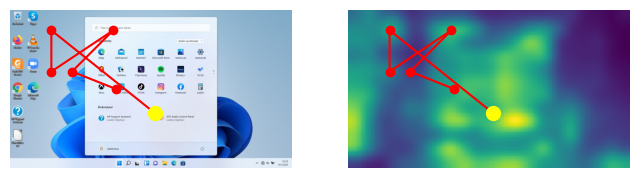

In [ ]:
# STEP 5. DOWNLOAD AN IMAGE FOR TESTING

!wget -O windows11.jpg https://taitonetti.fi/image/catalog/blog/2021/win11-taskbar.jpg
image = imread('windows11.jpg')




In [ ]:
# STEP 6: DEFINE PREVIOUS FIXATION POINTS

# location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
# you can try changing these
fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])


In [ ]:
# STEP 7: RUN THE MODEL


# rescale to match image size
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# renormalize log density
centerbias -= logsumexp(centerbias)

image_tensor = torch.tensor([image.transpose(2, 0, 1)])
centerbias_tensor = torch.tensor([centerbias])
x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]])
y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]])

# predict density
log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

# plot given fixations (red) and the predicted new one (yellow)
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs[0].imshow(image)
axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[1].set_axis_off()

---

## 3. Discussion

From a technical perspective, DeepGazeIII:
* Improves the accuracy of prediction over prior models
* Increases the scope of predictions froms saliency heatmaps to scanpaths
* Permits applications in UI design if finetuned/retrained with UI-specific gaze data

As a cognitive model, UMSI:
* Exploits convolution as a principle to process, similar to the human visual cortex.
* Models the interaction between what has been seen (fixation history) and what is presented (scene) 
* Treats gaze deployment as a stochastic process.

Some outstanding questions for cognitive modeling are: 
1. How do expectations about the image category bias attention to non-salient elements? 
2. How might complex images be parsed into a visual hierarchy in the visual system?  
3. How can we provide information about a user's task to a neural network model?